In [2]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from sklearn import datasets, decomposition

print("setup")

setup


Data before reducing the dimensionality
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
150

Data after reducing the dimensionality
[[-2.68412563  0.31939725 -0.02791483]
 [-2.71414169 -0.17700123 -0.21046427]
 [-2.88899057 -0.14494943  0.01790026]
 [-2.74534286 -0.31829898  0.03155937]
 [-2.72871654  0.32675451  0.09007924]
 [-2.28085963  0.74133045  0.16867766]
 [-2.82053775 -0.08946138  0.25789216]
 [-2.62614497  0.16338496 -0.02187932]
 [-2.88638273 -0.57831175  0.02075957]
 [-2.6727558  -0.11377425 -0.19763272]]
150


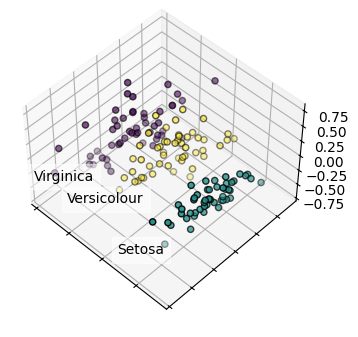

In [4]:
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

print("Data before reducing the dimensionality")
print(X[:10])
print(len(X))

fig = plt.figure(1, figsize=(4,3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0,0,0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=3)
X = pca.fit_transform(X)
print()
print("Data after reducing the dimensionality")
print(X[:10])
print(len(X))

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y== label, 0].mean(),
        X[y ==label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha= 0.5, edgecolor='w', facecolor='w'),

    )

y = np.choose(y, [1,2,0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap="viridis", edgecolors="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
#ax.zaxis.set_ticklabels([])
plt.show()



In [12]:
# principal component analysis

import tensorflow as tf
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [13]:
# loading the mnist data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = X_train / 255
x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
mean = x_train.mean(axis=1)
x_train = x_train - mean[:, None]

In [14]:
# computing the pca using the tensorflow

s, u, v = tf.linalg.svd(x_train)
print(s[:5])
s = tf.linalg.diag(s)
print(s[:5])

2024-03-09 23:08:12.883227: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


tf.Tensor([1189.2676   505.60413  473.37845  440.64957  410.0046 ], shape=(5,), dtype=float32)
tf.Tensor(
[[1189.2676     0.         0.      ...    0.         0.         0.     ]
 [   0.       505.60413    0.      ...    0.         0.         0.     ]
 [   0.         0.       473.37845 ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]
 [   0.         0.         0.      ...    0.         0.         0.     ]], shape=(5, 784), dtype=float32)


In [16]:
# adding closest point to a centroid

points_n = 200
clusters_n = 3
iteration_n = 100
seed = 123

np.random.seed(seed)
tf.random.set_seed(seed)

points = np.random.uniform(0, 10, (points_n, 2))
centroids = tf.slice(tf.random.shuffle(points), [0,0], [clusters_n, -1])

def closest_centroids(points, centroids):
    distances = tf.reduce_sum(tf.square(tf.subtract(points, centroids[:, None])), 2)
    assignment = tf.argmin(distances, 0)
    return assignment


def move_centroids(points, closest, centroids):
    return np.array([points[closest == k].mean(axis=0) for k in range(centroids.shape[0])])


for step in range(iteration_n):
    closest = closest_centroids(points, centroids)
    centroids = move_centroids(points, closest, centroids)


plt.scatter(points[:, 0], points[:, 1], points[:, 2], c=closest, s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], 'kx', markersize=15)

IndexError: index 2 is out of bounds for axis 1 with size 2